## Census Income Project


### This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.



In [5]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# read csv file and convert into dataframe
df = pd.read_csv('census-income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Observations:-
Firstly we observe the dataset:  

#### Independent Variables:

- Age : It shows the age of the persons
- Workclass : It has 8 categories Self-emp-not-inc,Private,State-gov,Federal-gov,Local-gov,Self-emp-inc,Without-pay,Never-worked
- Education: It shows the education of persons.
- Marital_status: It tells about the marital status.
- Occupation: It has 14 categories Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,
  Machine-op-inspct,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-       Forces        
- Relationship: it has five categories Husband,Not-in-family,Wife,Own-child,Unmarried.
- Sex: It shows the Gender of the persons Male/female
- Capital_gain: It shows the capital gain.
- Capital_loss: It shows the capital loss.
- Hours_per_week: It shows the working hours per week. 
- Native_country: It shows the countries.

#### Dependent Variable (Target Variable):

- Income: It predicts the income is >$50K or not. 



In [8]:
# let's check the shape of the dataset
df.shape

(32560, 15)

### ### We have 32560 rows and 15 columns

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
##Checking Data type of features and label
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 'Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income'  clolumns are having object type values .we will use encoding techniques to handles this situation.

In [11]:
# let's check the missing values of a dataset
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### There is no null values present in this dataset

### CHECKING DUPLICATES

In [12]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

       Age          Workclass  Fnlwgt      Education  Education_num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366 

In [13]:
# let's drop the duplicates
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(32536, 15)

###  Now, We have 32536 rows and 15 columns

In [15]:
# print all the datatypes and unique values
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------')

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
---------------------------------------------------------------------------------
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th    

### In unique values ,Workclass,Occupation and Native_country columns are having " ?" .we need to handle these columns

In [16]:
df['Workclass'] = df['Workclass'].replace(' ?',np.nan)
df['Occupation'] = df['Occupation'].replace(' ?',np.nan)
df['Native_country'] = df['Native_country'].replace(' ?',np.nan)

In [18]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA


### Visualize the relationship between target and categorical columns 

In [19]:
# print all categorical columns
for column in df.columns:
    if df[column].dtype== object:
        print(str(column))

Workclass
Education
Marital_status
Occupation
Relationship
Race
Sex
Native_country
Income


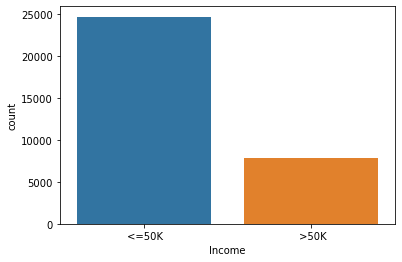

In [21]:
# let's visualize the Income
sns.countplot(df['Income'])
plt.show()

In [22]:
# count the number of persons whose income is <=50K or >50K
print(df['Income'].value_counts())

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


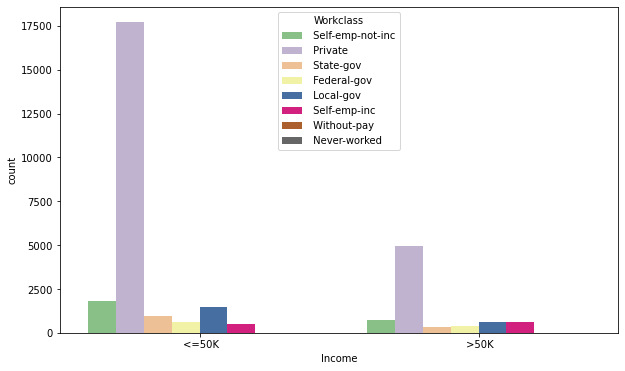

In [24]:
#let's visualize the relationship between Income and workclass
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Workclass',data=df, palette = 'Accent')
plt.show()

In [25]:
df.groupby('Workclass')['Income'].value_counts()

Workclass          Income
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17712
                    >50K      4961
 Self-emp-inc       >50K       622
                    <=50K      494
 Self-emp-not-inc   <=50K     1816
                    >50K       724
 State-gov          <=50K      944
                    >50K       353
 Without-pay        <=50K       14
Name: Income, dtype: int64

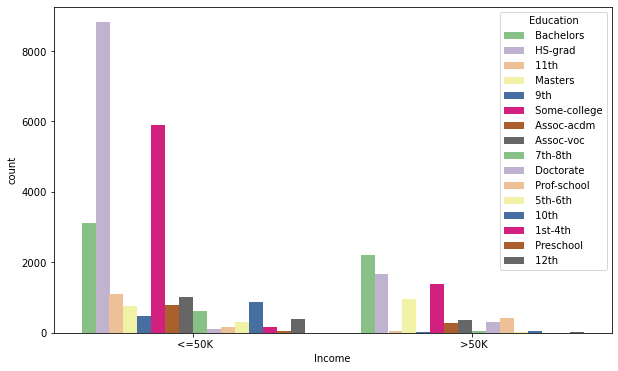

Education      Income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     160
                >50K        6
 5th-6th        <=50K     316
                >50K       16
 7th-8th        <=50K     605
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3131
                >50K     2221
 Doctorate      >50K      306
                <=50K     107
 HS-grad        <=50K    8820
                >50K     1674
 Masters        >50K      959
                <=50K     763
 Preschool      <=50K      50
 Prof-school    >50K      423
                <=50K     153
 Some-college   <=50K    5896
                >50K     1386
Name: Income, dtype: int64


In [26]:
#let's visualize the relationship between Income and Education
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Education',data=df, palette = 'Accent')
plt.show()
print(df.groupby('Education')['Income'].value_counts())

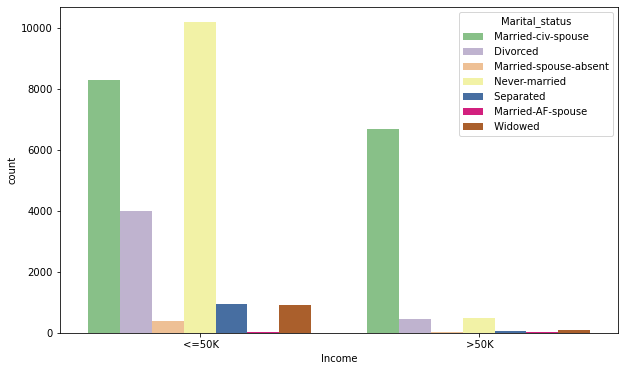

Marital_status          Income
 Divorced                <=50K     3978
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8280
                         >50K      6690
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10175
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
Name: Income, dtype: int64


In [27]:
#let's visualize the relationship between Income and Marital_status
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Marital_status',data=df, palette = 'Accent')
plt.show()
print(df.groupby('Marital_status')['Income'].value_counts())

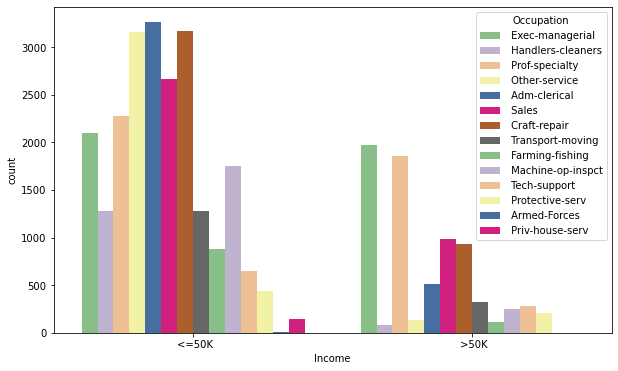

Occupation          Income
 Adm-clerical        <=50K    3260
                     >50K      507
 Armed-Forces        <=50K       8
                     >50K        1
 Craft-repair        <=50K    3165
                     >50K      929
 Exec-managerial     <=50K    2097
                     >50K     1968
 Farming-fishing     <=50K     877
                     >50K      115
 Handlers-cleaners   <=50K    1283
                     >50K       86
 Machine-op-inspct   <=50K    1751
                     >50K      249
 Other-service       <=50K    3154
                     >50K      137
 Priv-house-serv     <=50K     146
                     >50K        1
 Prof-specialty      <=50K    2278
                     >50K     1858
 Protective-serv     <=50K     438
                     >50K      211
 Sales               <=50K    2667
                     >50K      983
 Tech-support        <=50K     644
                     >50K      283
 Transport-moving    <=50K    1277
                     >50K   

In [28]:
#let's visualize the relationship between Income and Occupation
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Occupation',data=df, palette = 'Accent')
plt.show()
print(df.groupby('Occupation')['Income'].value_counts())

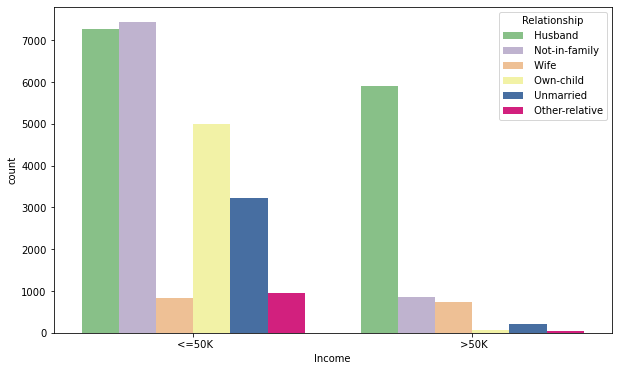

Relationship     Income
 Husband          <=50K    7271
                  >50K     5916
 Not-in-family    <=50K    7435
                  >50K      856
 Other-relative   <=50K     944
                  >50K       37
 Own-child        <=50K    4997
                  >50K       67
 Unmarried        <=50K    3227
                  >50K      218
 Wife             <=50K     823
                  >50K      745
Name: Income, dtype: int64


In [29]:
#let's visualize the relationship between Income and Relationship
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Relationship',data=df, palette = 'Accent')
plt.show()
print(df.groupby('Relationship')['Income'].value_counts())

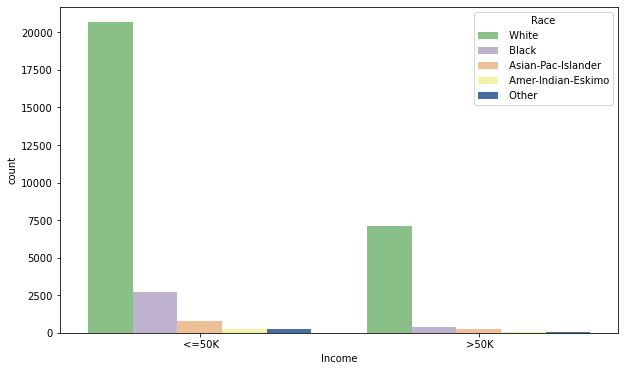

Race                 Income
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      762
                      >50K       276
 Black                <=50K     2735
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20679
                      >50K      7115
Name: Income, dtype: int64


In [30]:
#let's visualize the relationship between Income and Race
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Race',data=df, palette = 'Accent')
plt.show()
print(df.groupby('Race')['Income'].value_counts())

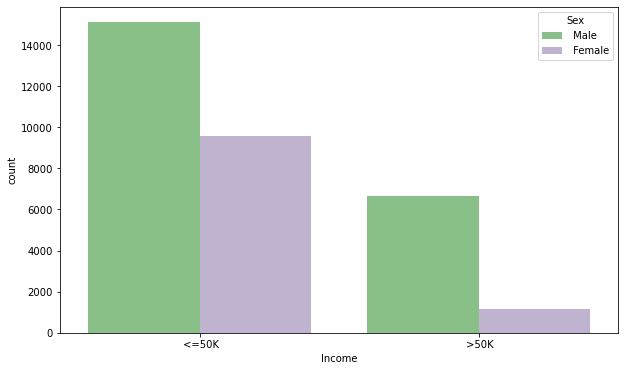

Sex      Income
 Female   <=50K     9583
          >50K      1179
 Male     <=50K    15114
          >50K      6660
Name: Income, dtype: int64


In [31]:
#let's visualize the relationship between Income and Sex
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Sex',data=df, palette = 'Accent')
plt.show()
print(df.groupby('Sex')['Income'].value_counts())

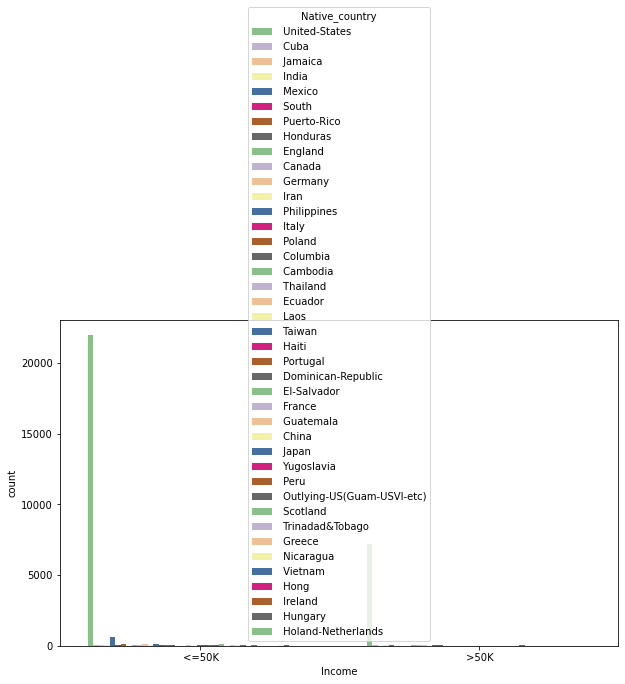

Native_country  Income
 Cambodia        <=50K      12
                 >50K        7
 Canada          <=50K      82
                 >50K       39
 China           <=50K      55
                          ... 
 United-States   >50K     7169
 Vietnam         <=50K      62
                 >50K        5
 Yugoslavia      <=50K      10
                 >50K        6
Name: Income, Length: 80, dtype: int64


In [32]:
#let's visualize the relationship between Income and Native_country
plt.figure(figsize=(10,6))
sns.countplot(x=df['Income'],hue='Native_country',data=df, palette = 'Accent')
plt.show()
print(df.groupby('Native_country')['Income'].value_counts())

### Visualize the relationship between target and continuous data columns 

In [33]:
# print all continuous data columns
for column in df.columns:
    if df[column].dtype != object:
         print(str(column))


Age
Fnlwgt
Education_num
Capital_gain
Capital_loss
Hours_per_week


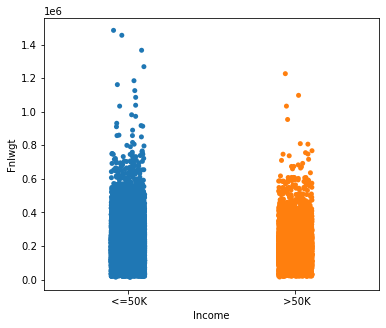

In [34]:
# let's visualize the relationship between Income and Fnlwgt
plt.figure(figsize = (6,5))
sns.stripplot(y='Fnlwgt',x = 'Income',data = df)
plt.show()


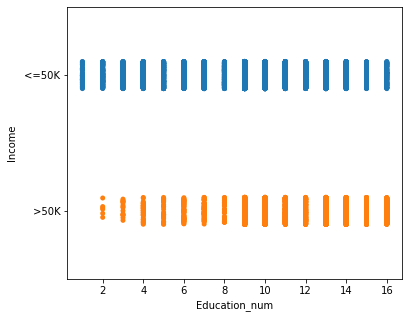

In [36]:
# let's visualize the relationship between Income and Education_num
plt.figure(figsize = (6,5))
sns.stripplot(x='Education_num', y= 'Income',data = df)
plt.show()


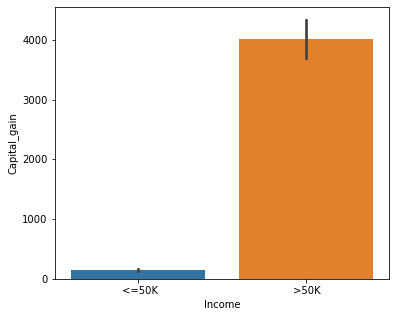

In [37]:
# let's visualize the relationship between Income and Capital_gain
plt.figure(figsize = (6,5))
sns.barplot(y='Capital_gain',x = 'Income',data = df)
plt.show()


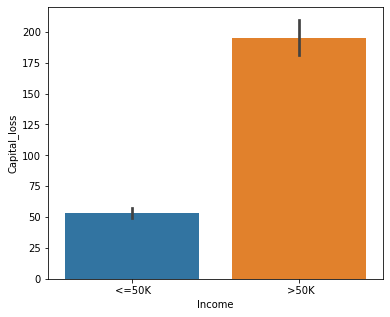

In [38]:
# let's visualize the relationship between Income and Capital_loss
plt.figure(figsize = (6,5))
sns.barplot(y='Capital_loss',x = 'Income',data = df)
plt.show()


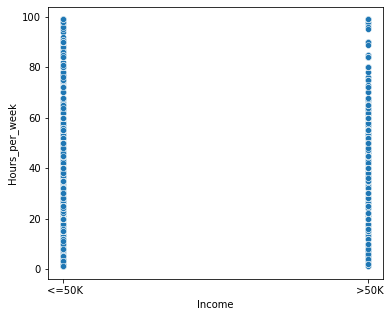

In [39]:
# let's visualize the relationship between Income and Hours_per_week
plt.figure(figsize = (6,5))
sns.scatterplot(y='Hours_per_week',x= 'Income',data = df)
plt.show()


<AxesSubplot:xlabel='Age', ylabel='Count'>

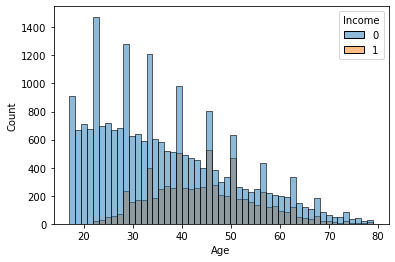

In [62]:
sns.histplot(x='Age',hue='Income',data = df)



In [41]:
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [42]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [43]:
# let's treat with nulls
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()) 

In [44]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [45]:
# stats about data
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.376506,1.897843e+05,10.297547,10.081725,2.611384,6.422701,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.472799,0.240933
std,13.638193,1.582521,1.055563e+05,3.870195,2.571622,1.506304,4.329177,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,6.080915,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


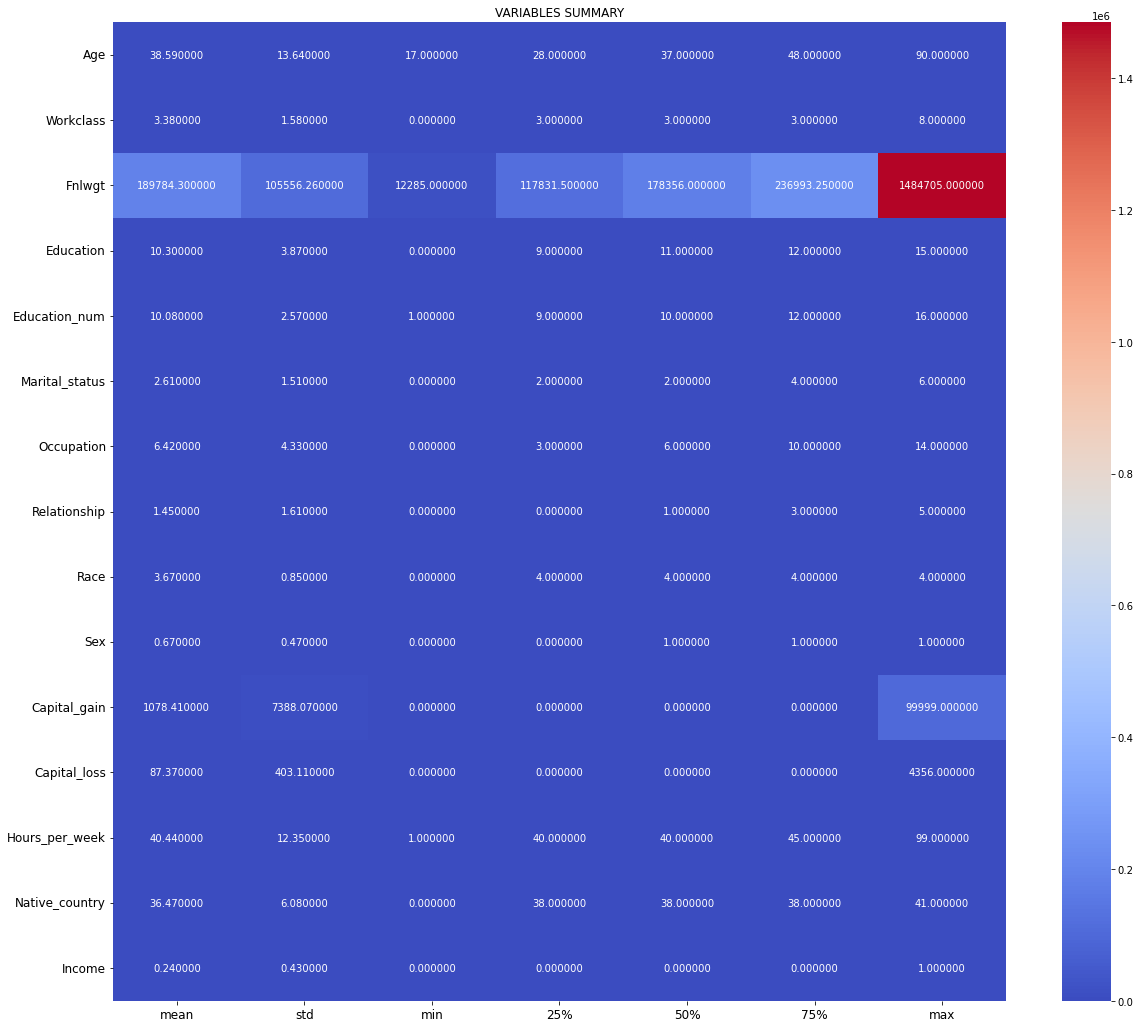

In [46]:
df.describe()
plt.figure(figsize=(20,18))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

## Observations:-
- Age and Hours_per_week columns are indicating the presence of outliers
- Fnlwgt is also indicating the presence of outliers
- Capital_gain and Capital_loss of data is confusing.
- Most of the features are having categorical type data

In [49]:
df.drop(columns=['Education_num','Fnlwgt','Capital_gain','Capital_loss'],inplace = True)

In [50]:
df.shape

(32536, 11)

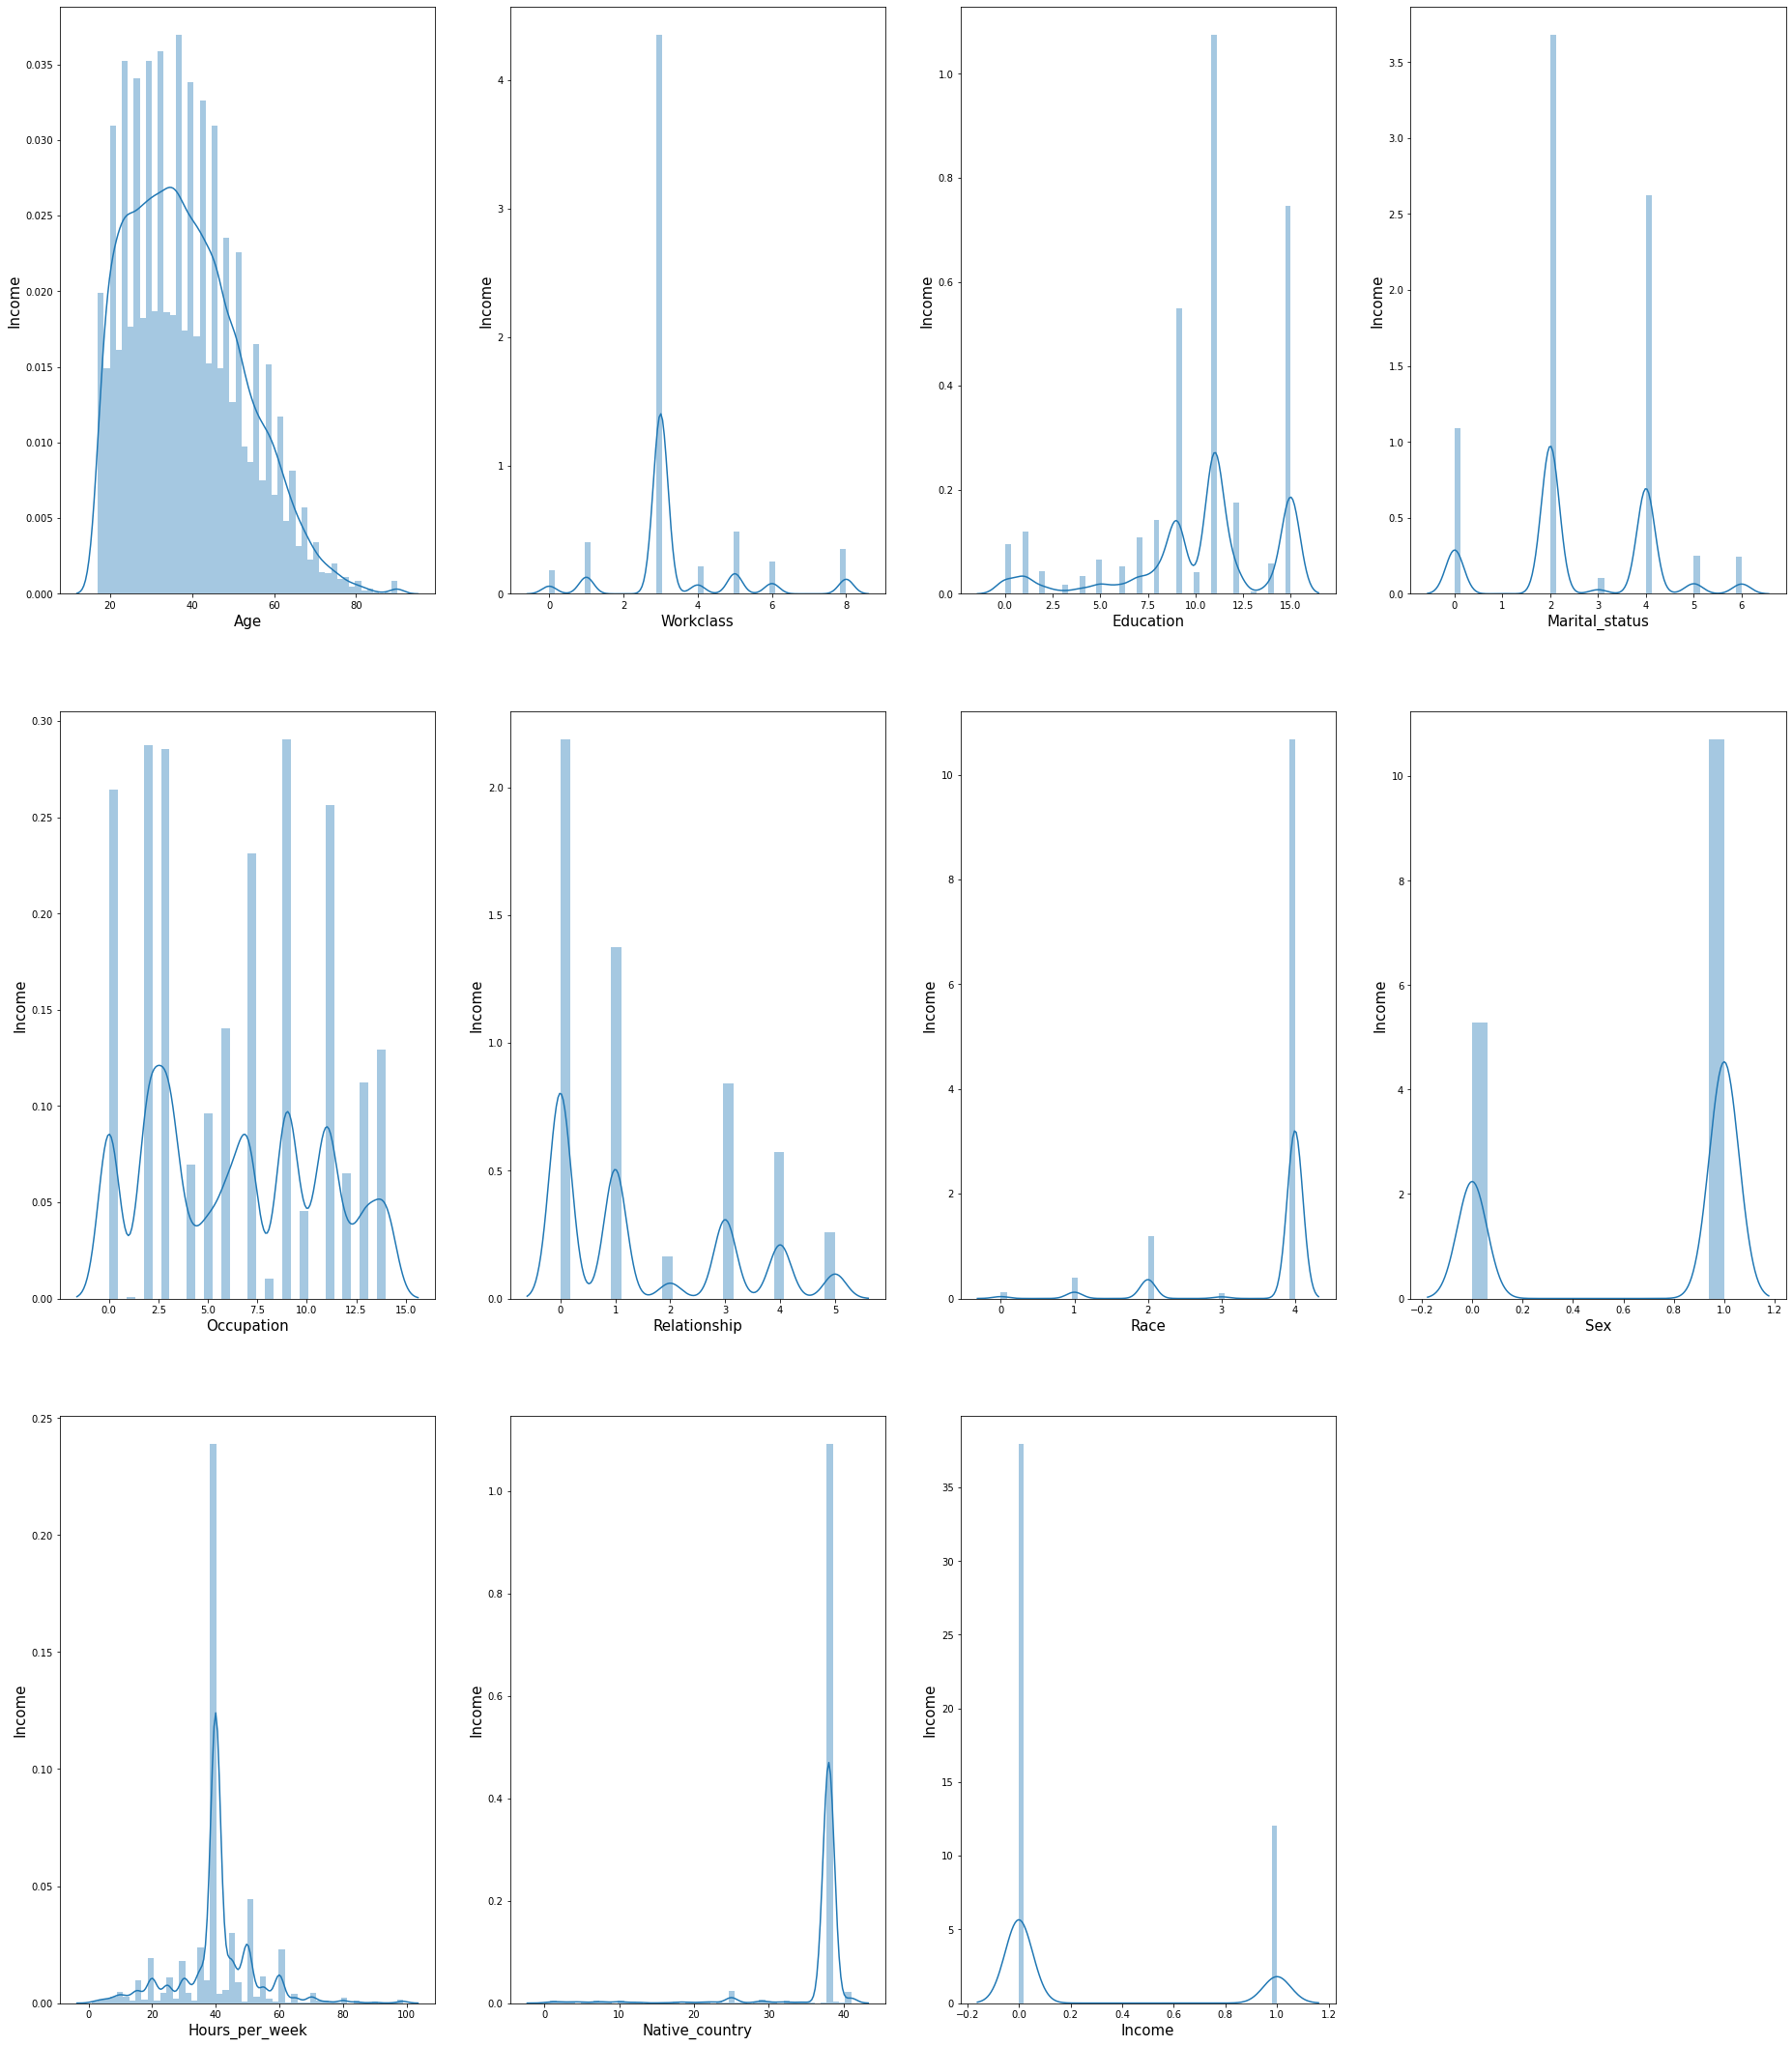

In [51]:
# let's visualize the data using distribution plot
plt.figure(figsize=(32,38))
pn = 1
for col in df:
    if pn <= 11:
        ax = plt.subplot(3,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Income',fontsize = 15)
    pn +=1
plt.show()    

## Observations:-
### most of the features are having categorical values and Age and hours_per_week are showing skewness 

## Checking Outliers


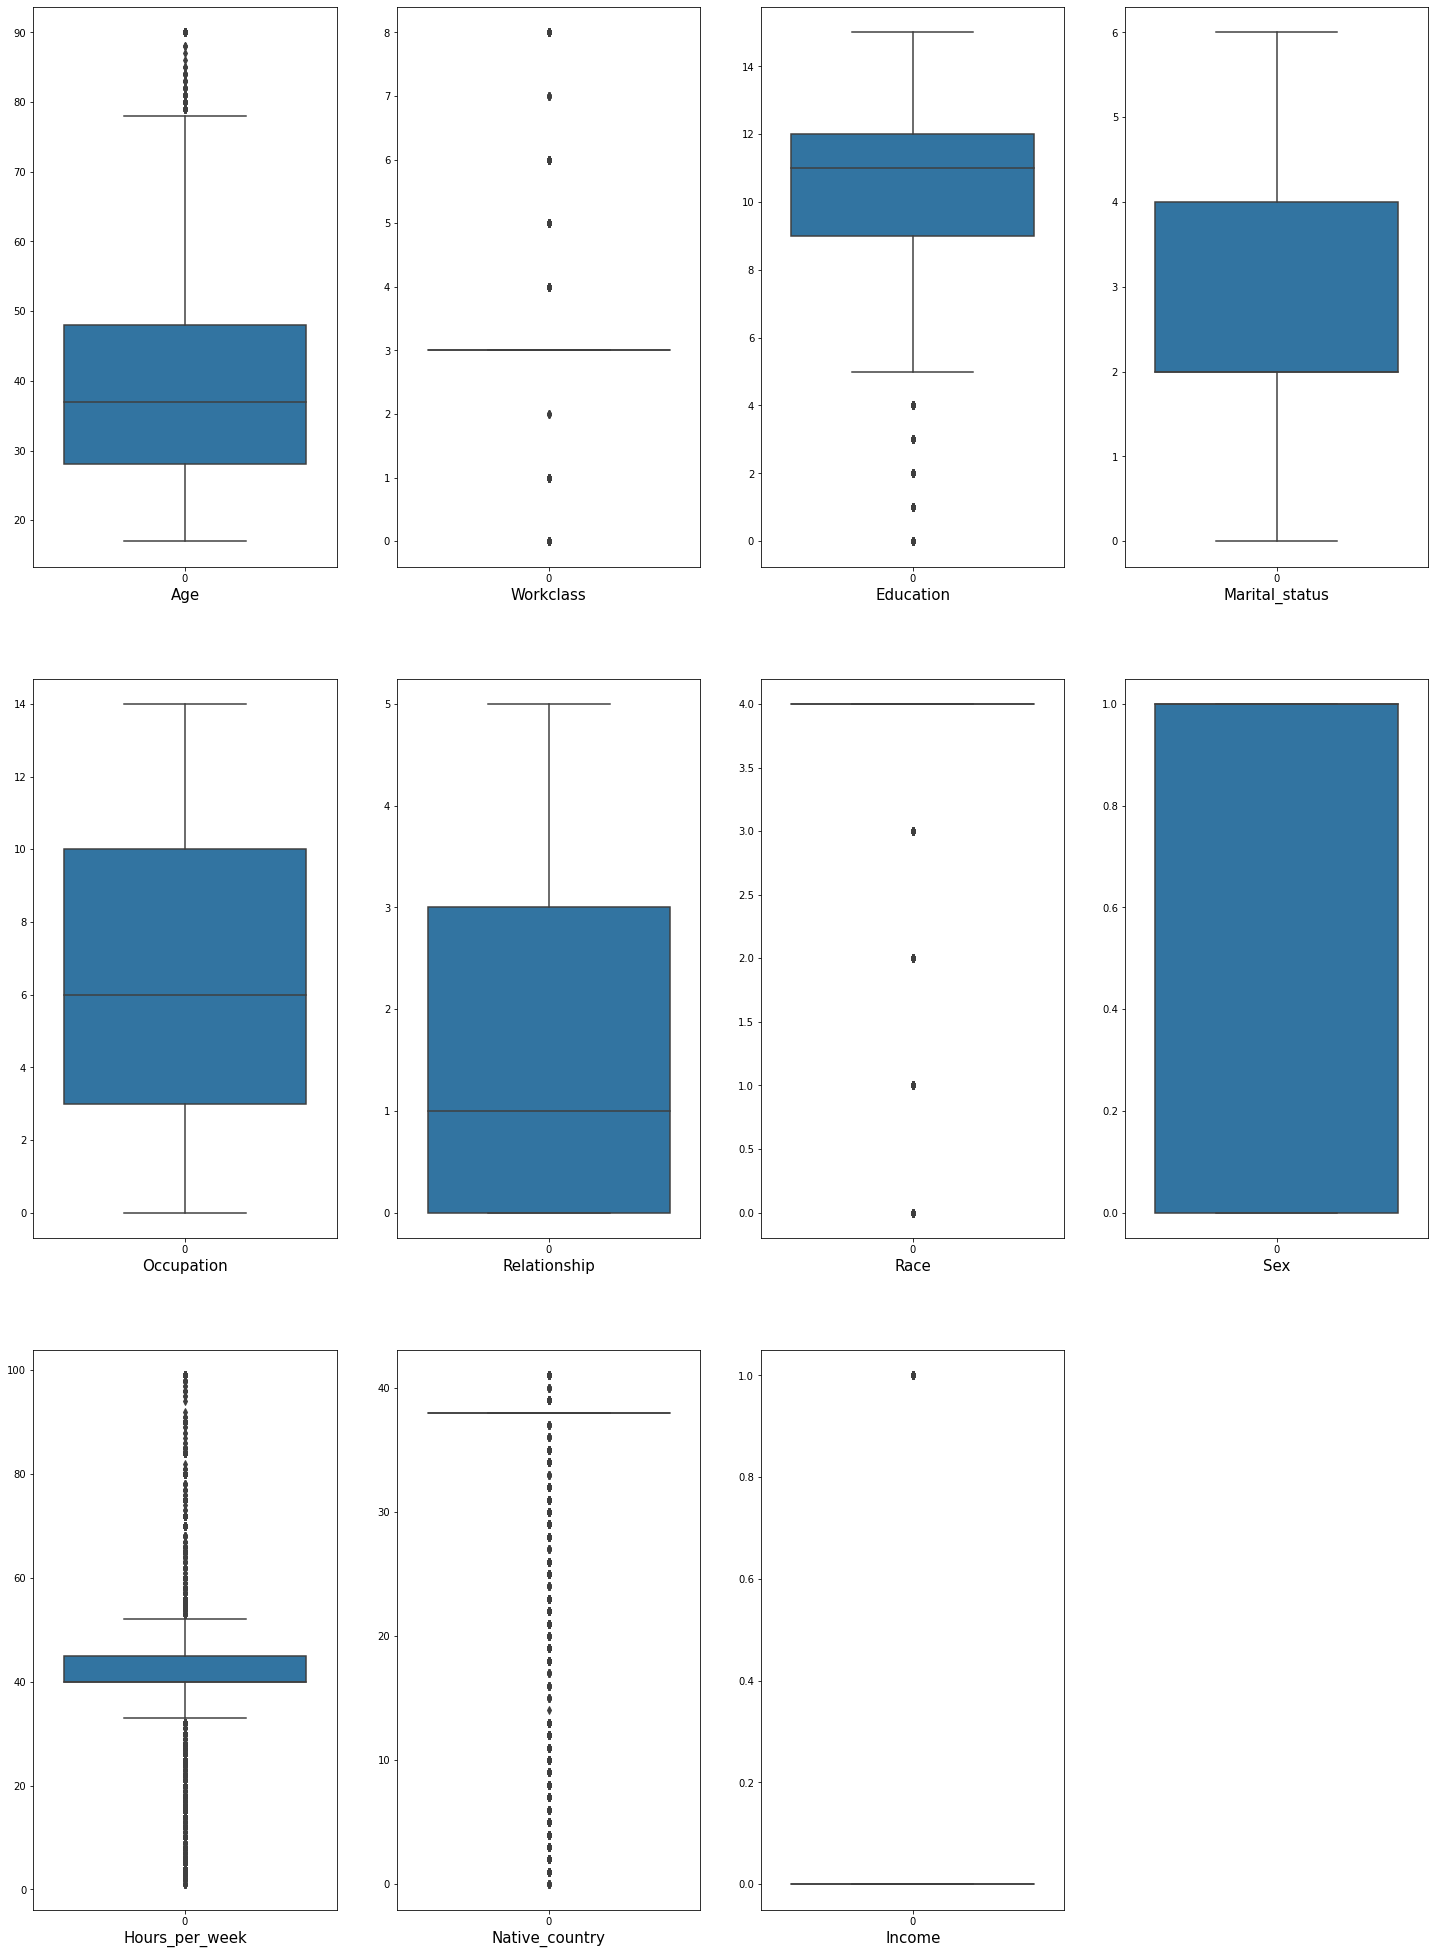

In [53]:
plt.figure(figsize=(25,35))
pn = 1
for col in df:
    if pn <= 11:
        ax = plt.subplot(3,4,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation,  Age and Hours_per_week are indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [54]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (32536, 11)
Shape of the dataframe after removing outliers:  (29766, 11)
Percentage of data loss post outlier removal:  8.51364642242439


## Checking Correlation

In [55]:
df.corr()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.046531,-0.003764,-0.285083,0.008435,-0.270876,0.022233,0.093620,0.093282,0.036119,0.248441
Workclass,0.046531,1.000000,-0.018504,0.042757,0.305547,0.015350,0.031514,0.002854,-0.099835,0.005617,-0.054280
Education,-0.003764,-0.018504,1.000000,-0.040008,-0.046307,-0.008814,0.027685,-0.031549,0.060510,0.103728,0.075390
Marital_status,-0.285083,0.042757,-0.040008,1.000000,0.052791,0.185138,-0.088190,-0.130229,-0.198375,-0.030887,-0.197947
Occupation,0.008435,0.305547,-0.046307,0.052791,1.000000,-0.016276,-0.005124,0.027360,-0.062643,0.020937,0.010761
Relationship,-0.270876,0.015350,-0.008814,0.185138,-0.016276,1.000000,-0.145466,-0.582858,-0.266862,-0.007106,-0.252381
Race,0.022233,0.031514,0.027685,-0.088190,-0.005124,-0.145466,1.000000,0.123070,0.058827,0.008071,0.098070
Sex,0.093620,0.002854,-0.031549,-0.130229,0.027360,-0.582858,0.123070,1.000000,0.241538,-0.013461,0.216722
Hours_per_week,0.093282,-0.099835,0.060510,-0.198375,-0.062643,-0.266862,0.058827,0.241538,1.000000,0.005139,0.244158
Native_country,0.036119,0.005617,0.103728,-0.030887,0.020937,-0.007106,0.008071,-0.013461,0.005139,1.000000,0.053416


In [56]:
# let's check the correation with Income
df.corr()['Income'].sort_values


<bound method Series.sort_values of Age               0.248441
Workclass        -0.054280
Education         0.075390
Marital_status   -0.197947
Occupation        0.010761
Relationship     -0.252381
Race              0.098070
Sex               0.216722
Hours_per_week    0.244158
Native_country    0.053416
Income            1.000000
Name: Income, dtype: float64>

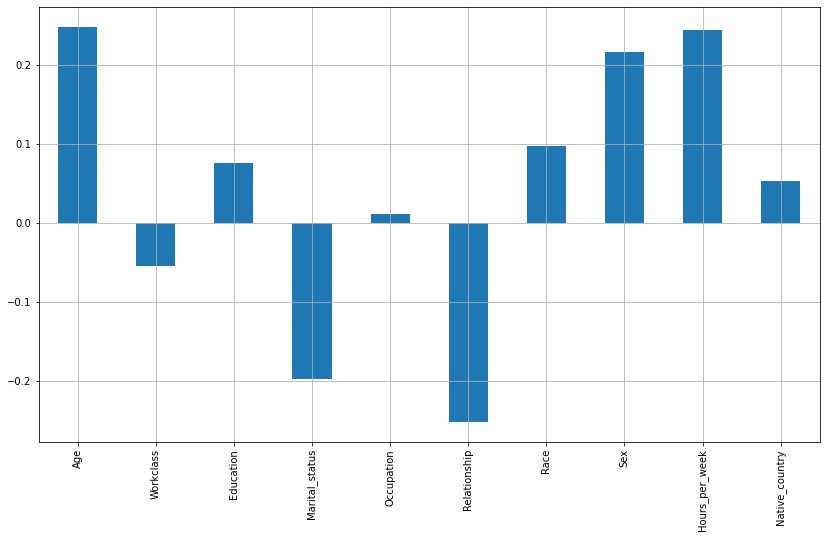

In [57]:
df.drop('Income',axis=1).corrwith(df.Income).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

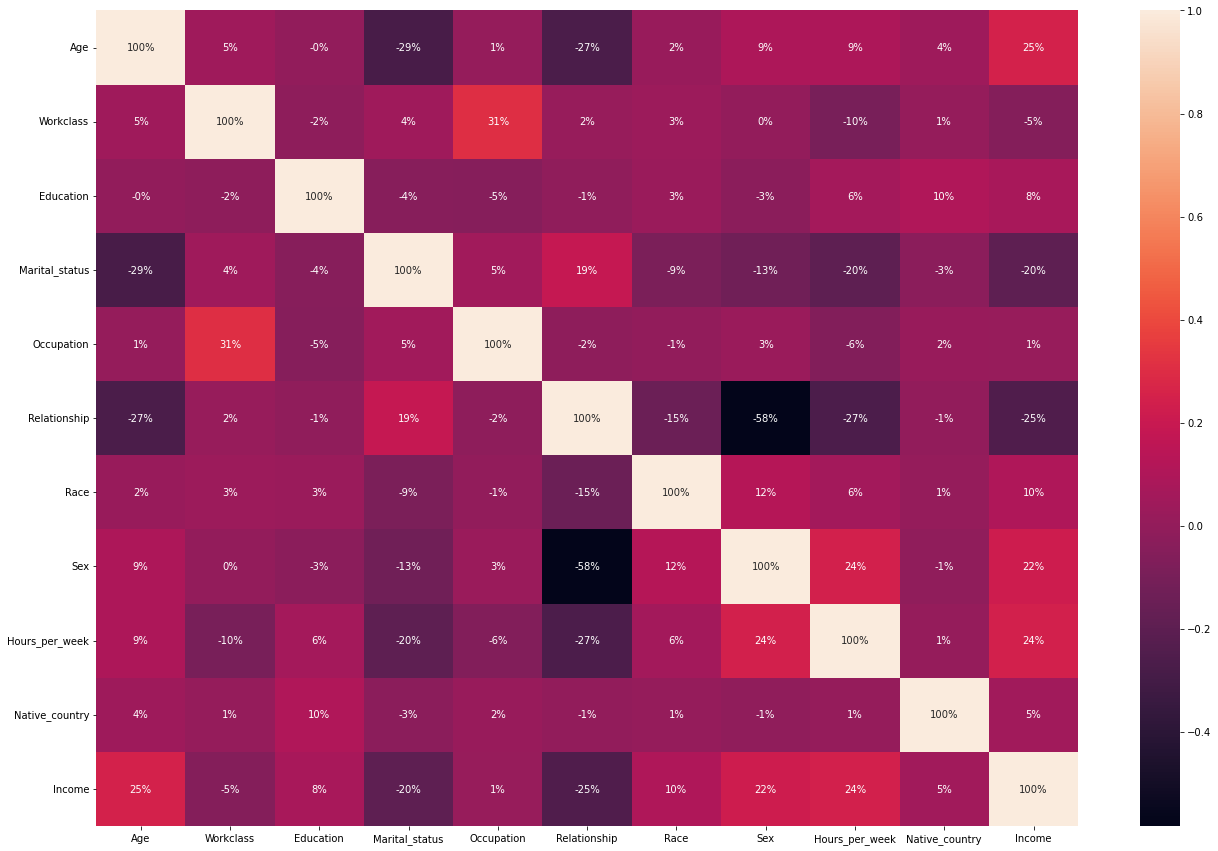

In [58]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- Workclass,Marital_status and Relationship are negatively correlated with target.
- Age,Education,Occcupation,Race,Sex,Hours_per_week and Native_country are positively correlated with target variable
- There is no multicollinearity problem exist in  this dataset. 
- maximum correlation : Age
- minimum correlation : Occupation                             
                                  

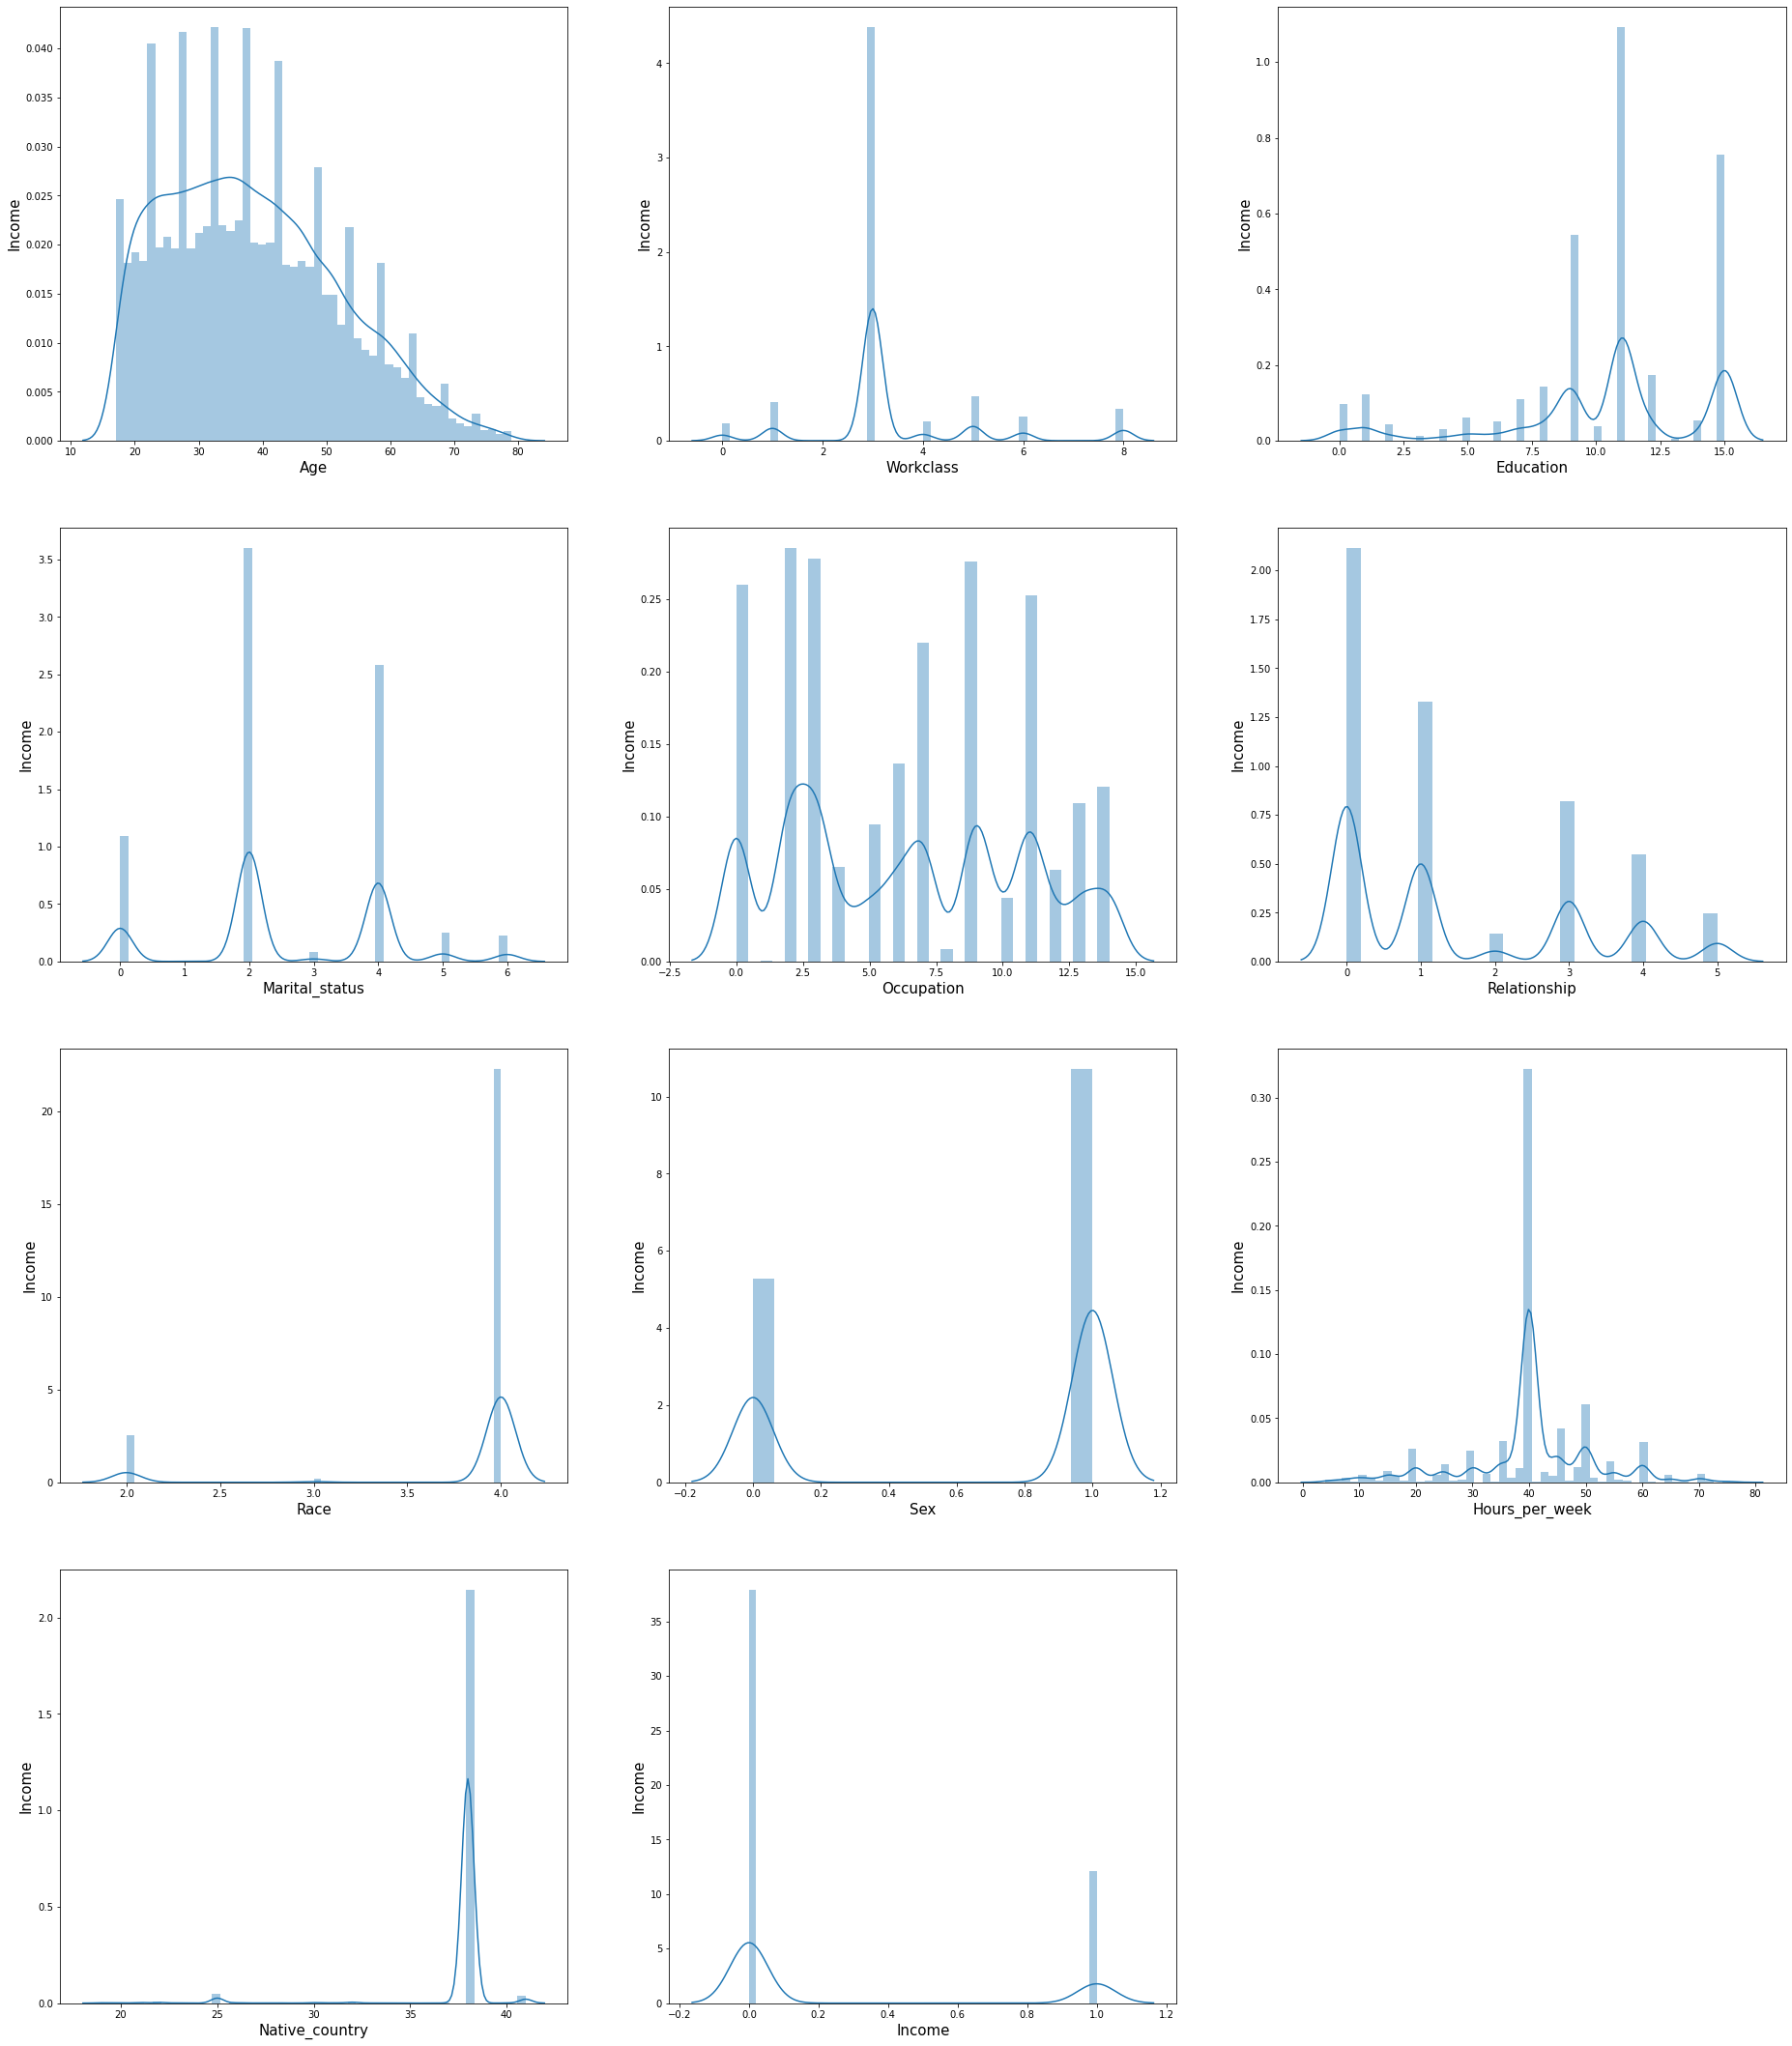

In [63]:
# let's visualize the data after removing outliers
plt.figure(figsize=(32,38))
pn = 1
for col in df:
    if pn <= 11:
        ax = plt.subplot(4,3,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Income',fontsize = 15)
    pn +=1
plt.show()    

 ### data is distributted normally but some features are having  skewness

### Skewness

In [64]:
df.skew()

Age               0.467430
Workclass         1.172478
Education        -0.949575
Marital_status   -0.020455
Occupation        0.135149
Relationship      0.788676
Race             -2.580831
Sex              -0.720978
Hours_per_week   -0.346190
Native_country   -5.000176
Income            1.206203
dtype: float64

## Dividing data in features and label


In [65]:
x = df.drop('Income',axis = 1)
x.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,9,2,3,0,4,1,13,38
1,38,3,11,0,5,1,4,1,40,38
2,53,3,1,2,5,0,2,1,40,38
4,37,3,12,2,3,5,4,0,40,38
5,49,3,6,3,7,1,2,0,16,22


In [66]:
y = df['Income']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [67]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.910814,1.064308,-0.486254,-0.376532,-0.688030,-1.092396,0.348762,0.702515,-2.226430,0.045897
1,0.107035,-0.147596,0.082143,-1.771833,-0.182257,0.139736,0.348762,0.702515,-0.054192,0.045897
2,1.088071,-0.147596,-2.072213,-0.376532,-0.182257,-1.092396,-2.870606,0.702515,-0.054192,0.045897
3,0.031611,-0.147596,0.387576,-0.376532,-0.688030,1.549674,0.348762,-1.423457,-0.054192,0.045897
4,0.849903,-0.147596,-1.223238,0.281849,0.260421,0.139736,-2.870606,-1.423457,-2.022008,-3.569868
5,1.029867,1.064308,0.082143,-0.376532,-0.688030,-1.092396,0.348762,0.702515,0.412618,0.045897
6,-0.457042,-0.147596,0.387576,0.924500,0.661411,0.139736,0.348762,-1.423457,0.895187,0.045897
7,0.394296,-0.147596,-0.486254,-0.376532,-0.688030,-1.092396,0.348762,0.702515,-0.054192,0.045897
8,-1.236186,-0.147596,-0.486254,0.924500,-1.717217,1.094333,0.348762,-1.423457,-0.934956,0.045897
9,-0.370849,-0.147596,-0.993997,0.924500,1.032033,0.139736,-2.870606,0.702515,0.895187,0.045897


In [68]:
pd.DataFrame(x).skew().sort_values()

Race             -2.518705
Sex              -0.720978
Education        -0.311410
Occupation       -0.201459
Marital_status   -0.118717
Age              -0.020556
Hours_per_week    0.105156
Relationship      0.125276
Workclass         0.138539
Native_country    1.229277
dtype: float64

### Every value will be reduced after transformation

In [69]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[ 0.9108137 ,  1.06430818, -0.48625449, ...,  0.70251501,
        -2.22643022,  0.045897  ],
       [ 0.10703516, -0.14759576,  0.08214321, ...,  0.70251501,
        -0.05419223,  0.045897  ],
       [ 1.08807067, -0.14759576, -2.07221255, ...,  0.70251501,
        -0.05419223,  0.045897  ],
       ...,
       [ 1.36697219, -0.14759576,  0.08214321, ..., -1.42345712,
        -0.05419223,  0.045897  ],
       [-1.34746393, -0.14759576,  0.08214321, ...,  0.70251501,
        -1.73200388,  0.045897  ],
       [ 1.0298666 ,  0.4890953 ,  0.08214321, ..., -1.42345712,
        -0.05419223,  0.045897  ]])

## Final features Multi-Collinearity Check using VIF**


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Age,1.263192
1,Workclass,1.072603
2,Education,1.012432
3,Marital_status,1.176712
4,Occupation,1.073388
5,Relationship,1.929885
6,Race,1.032685
7,Sex,1.646582
8,Hours_per_week,1.130235
9,Native_country,1.006010


### There is no sign of Multi-collinearity

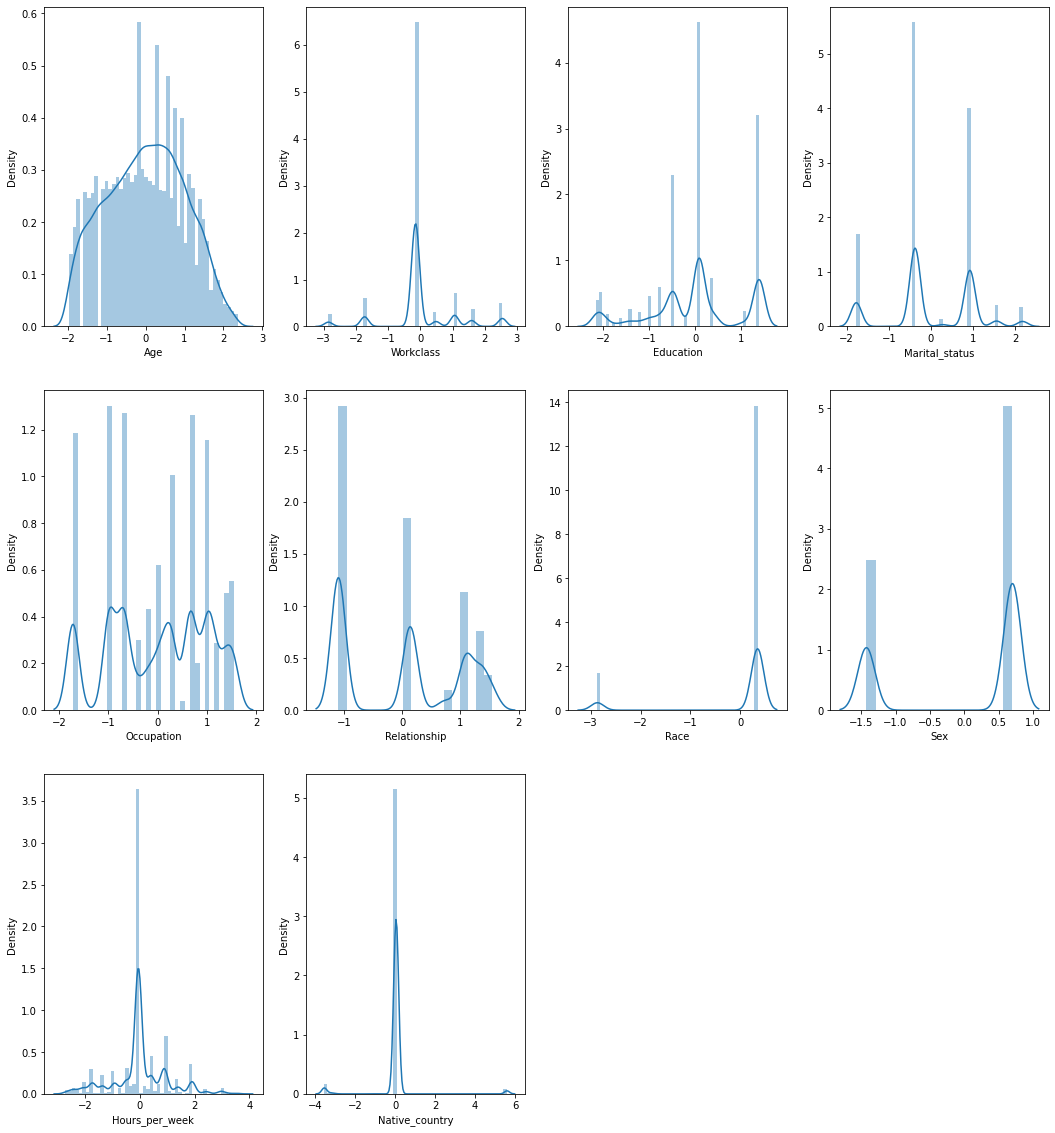

In [71]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=11:
        plt.subplot(3,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally

# Model Building


In [72]:
# lets import all necessary libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

## Best Random State

In [87]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 0.7967752771246221 on Random State 238


In [78]:
# create empty lits
accur_score=[]
c_v_score=[]
diff=[]

In [88]:
# classification model Function
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 238)
    # training the model
    model.fit(x_train,y_train)
    
    # predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    accur_score.append(acc_score)
    print('Accuracy score',acc_score)
    
    # Confusion_matrix
    matrix = confusion_matrix(y_test,pred)
    print('\nConfusion Matrix: \n',matrix)

    # Classification report
    class_report=classification_report(y_test,pred)
    print('\nClassification Report:\n',class_report)
    
    # Cross validation score
    cv_score=(cross_val_score(model,x,y,cv=15).mean())*100
    c_v_score.append(cv_score)
    print('Cross validation score',cv_score)
    
    # result of accuracy score minus cv_score
    result = acc_score-cv_score
    diff.append(result)
    print('\n Accuracy score - cross val score is:',result)


## Logistic regression


In [76]:
model=LogisticRegression()
classify(model,x,y)

Accuracy score 79.2072556264696

Confusion Matrix: 
 [[4322  285]
 [ 953  394]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      4607
           1       0.58      0.29      0.39      1347

    accuracy                           0.79      5954
   macro avg       0.70      0.62      0.63      5954
weighted avg       0.77      0.79      0.76      5954

Cross validation score 77.74645357655533

 Accuracy score - cross val score is: 1.4608020499142782


### After setting the random state = 477 , We got the accuracy score is 79%


## KNN

In [80]:
model = KNeighborsClassifier()
classify(model,x,y)

Accuracy score 82.33120591199193

Confusion Matrix: 
 [[4122  470]
 [ 582  780]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4592
           1       0.62      0.57      0.60      1362

    accuracy                           0.82      5954
   macro avg       0.75      0.74      0.74      5954
weighted avg       0.82      0.82      0.82      5954

Cross validation score 81.11607723246934

 Accuracy score - cross val score is: 1.2151286795225928


### After setting the random state = 66 , We got the accuracy score is 82%


## Random Forest

In [83]:
model =RandomForestClassifier()
classify(model,x,y)

Accuracy score 82.83506886126973

Confusion Matrix: 
 [[4149  443]
 [ 579  783]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4592
           1       0.64      0.57      0.61      1362

    accuracy                           0.83      5954
   macro avg       0.76      0.74      0.75      5954
weighted avg       0.82      0.83      0.83      5954

Cross validation score 81.89220565531812

 Accuracy score - cross val score is: 0.9428632059516104


### After setting the random state = 66, We got the accuracy score is 83%


## AdaBoost

In [86]:
model=AdaBoostClassifier()
classify(model,x,y)

Accuracy score 84.95129324823648

Confusion Matrix: 
 [[4214  316]
 [ 580  844]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4530
           1       0.73      0.59      0.65      1424

    accuracy                           0.85      5954
   macro avg       0.80      0.76      0.78      5954
weighted avg       0.84      0.85      0.84      5954

Cross validation score 83.73656421819561

 Accuracy score - cross val score is: 1.2147290300408713


### After setting the random state = 319 , We got the accuracy score is 84%


## Decision tree

In [89]:
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy score 79.37520994289554

Confusion Matrix: 
 [[3960  599]
 [ 629  766]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4559
           1       0.56      0.55      0.56      1395

    accuracy                           0.79      5954
   macro avg       0.71      0.71      0.71      5954
weighted avg       0.79      0.79      0.79      5954

Cross validation score 78.1497149318816

 Accuracy score - cross val score is: 1.2254950110139333


### After setting the random state = 238 , We got the accuracy score is 79%


## Compare the models


In [101]:
# create a list of labels of build models
label = ['LogisticRegression','KNN','Random Forest','AdaBoost','Decision Tree']
print(label)
print(accur_score)
print(c_v_score)
print(diff)


['LogisticRegression', 'KNN', 'Random Forest', 'AdaBoost', 'Decision Tree']
[79.2072556264696, 82.33120591199193, 82.83506886126973, 84.95129324823648, 79.37520994289554]
[77.74645357655533, 81.11607723246934, 81.89220565531812, 83.73656421819561, 78.1497149318816]
[1.4608020499142782, 1.2151286795225928, 0.9428632059516104, 1.2147290300408713, 1.2254950110139333]


In [100]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Accuracy Score':accur_score,'Cross validation Score':c_v_score,'Difference':diff})
score_df

,Model name,Accuracy Score,Cross validation Score,Difference
0,LogisticRegression,79.207256,77.746454,1.460802
1,KNN,82.331206,81.116077,1.215129
2,Random Forest,82.835069,81.892206,0.942863
3,AdaBoost,84.951293,83.736564,1.214729
4,Decision Tree,79.375210,78.149715,1.225495


 ###  as per my observation , I choose Random Forest as the best model and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING OF FINAL MODEL


In [102]:
rf = RandomForestClassifier()

In [103]:
params = {
    'n_estimators':[100],
    'n_jobs':[50,60],
    'max_depth':[15,19],
    'criterion':['entropy','gini'],
    'random_state':[30,40,50],
    'min_samples_leaf':[2,4,3]       }

In [104]:
grd = GridSearchCV(rf,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 19], 'min_samples_leaf': [2, 4, 3],
                         'n_estimators': [100], 'n_jobs': [50, 60],
                         'random_state': [30, 40, 50]})

In [106]:
rf = grd.best_estimator_
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       n_jobs=50, random_state=50)

In [108]:
pred = rf.predict(x_test)
accuracy_score(y_test,pred)

0.8380920389654014

## ROC AUC Curve

In [110]:
from sklearn.metrics import plot_roc_curve

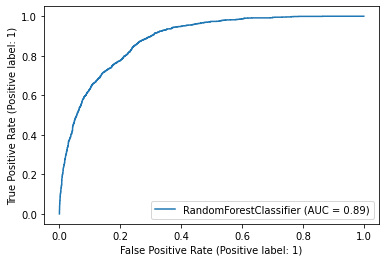

In [111]:
plot_roc_curve(rf,x_test,y_test)
plt.show()

# Save the final model


In [109]:
import joblib
joblib.dump(rf,'Census Income.pkl')

['Census Income.pkl']

## Model is completed